<a href="https://colab.research.google.com/github/Abhash600/EDA-and-preprocessing/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv

data=pd.read_csv('titanic.csv')

--2021-03-12 22:54:20--  https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60301 (59K) [text/plain]
Saving to: ‘titanic.csv.14’

titanic.csv.14      100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-03-12 22:54:20 (4.59 MB/s) - ‘titanic.csv.14’ saved [60301/60301]



In [ ]:
data.head()
# Target feature is 'Survived'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Let's look at the dimensions in our data
data.shape

(891, 12)

In [ ]:
# finding some statistical measures about the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()
# Here we observe what type of data is present in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


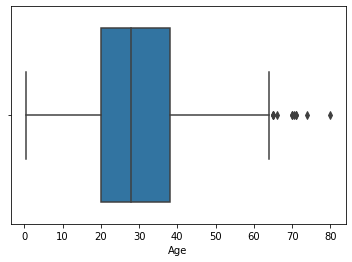

In [ ]:
# Dealing with outliers

# Let's look at boxplots to get so insight about the outliers in different columns.
# for 'Age' feature
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


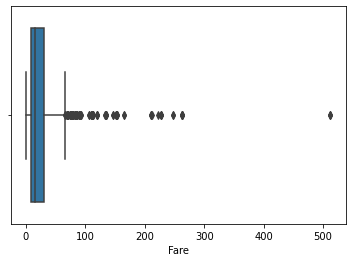

In [ ]:
# for 'Fare' feature
sns.boxplot(data['Fare'])

In [ ]:
# IQR method 
# This function returns the lower and upper threshold for outlier detection
def outlier(col):
  q1,q3=col.quantile([0.25,0.75])
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  return lower,upper


In [ ]:
# Let's remove outliers from 'Age' and 'Fare' column 
# Either we could delete the rows containing the outlier values or we could replace them with the 'mean' or 'median'

l1,u1=outlier(data['Age']) # 1st feature is age
m1=data['Age'].mean()

l2,u2=outlier(data['Fare']) # 2nd feature is Fare
m2=data['Fare'].mean() 

for i in range(data.shape[0]):
  x1=data.iloc[i,5]
  x2=data.iloc[i,9]
  if x1>u1 or x1<l1:
    data.iloc[i,5]=m1
  elif x2>u2 or x2<l2:
    data.iloc[i,9]=m2

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000000,C148,C


In [ ]:
# missing values
# NaN is a special notation given by numpy to denote empty values.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# we can see that the 'Cabin' feature has a lot of examples missing (almost more than 60 percent)
# So dropping the column would be a fair choice

# also we could drop the 'Name' and 'Ticket' feature
data=data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250000,S
1,1,1,female,38.0,1,0,32.204208,C
2,1,3,female,26.0,0,0,7.925000,S
3,1,1,female,35.0,1,0,53.100000,S
4,0,3,male,35.0,0,0,8.050000,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000000,S
887,1,1,female,19.0,0,0,30.000000,S
888,0,3,female,NaN,1,2,23.450000,S
889,1,1,male,26.0,0,0,30.000000,C


In [ ]:
# Let's now look at what categorical and continuous features we have in our dataset

# Categorical features ---> Embarked,Sex, Pclass, SibSp, Parch
# Continuous features ----> Age,Fare

# Here in our case we will have to fill 'Age' (Which is a continuous feature)
# and 'Embarked' (which is a continuous feature)
# Both are filled differently

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# But before we start filling in those missing values, we need to split the data into train and test split
# We'll why do we do the splitting before and not after?

#Splitting our data into X_data and Target
X_data=data.drop('Survived',axis=1)
Y_data=pd.DataFrame(data['Survived'])

#Splitting into train and test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,Y_data)

# From now on we are gonna perform all the operations on the train set only 
# And we use the parameters obtained after fitting on train set to transform our test set.

In [ ]:
# Filling 'Embarked'
# To fill a categorical variable it's always a good step to count the frequency of each value in the feature
print('For train set:')
print(X_train['Embarked'].value_counts())
print('----------------------------------')
print('For test set:')
print(X_test['Embarked'].value_counts())

For train set:
S    481
C    125
Q     60
Name: Embarked, dtype: int64
----------------------------------
For test set:
S    163
C     43
Q     17
Name: Embarked, dtype: int64


In [ ]:
print('For train set:')
print(X_train.isnull().sum())
print('--------------------------------')
print('For test set:')
print(X_test.isnull().sum())

For train set:
Pclass        0
Sex           0
Age         130
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
--------------------------------
For test set:
Pclass       0
Sex          0
Age         47
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


In [ ]:
# From above we can see that 'S' is the majority class
# So we can fill the 2 missing values in 'Embarked' with 'S'
# for that we wil use fillna function of the pandas library

X_train['Embarked']=X_train['Embarked'].fillna('S')
X_test['Embarked']=X_test['Embarked'].fillna('S')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train['Embarked'].isnull().sum()

0

In [ ]:
# Look now the number of missing values in 'Embarked' is 0
# Now let's deal with 'Age' column (It has 131 missing values in train set)

# Remember that 'Age' was a continuous feature.
# Filling continuous features can be done by either (mean , median, forward fill, backfill)

X_train['Age']=X_train['Age'].fillna(X_train['Age'].mean())
X_train['Fare']=X_train['Fare'].fillna(X_train['Fare'].mean())

X_test['Age']=X_test['Age'].fillna(X_train['Age'].mean())
X_test['Fare']=X_test['Fare'].fillna(X_train['Fare'].mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Exploratory data analysis

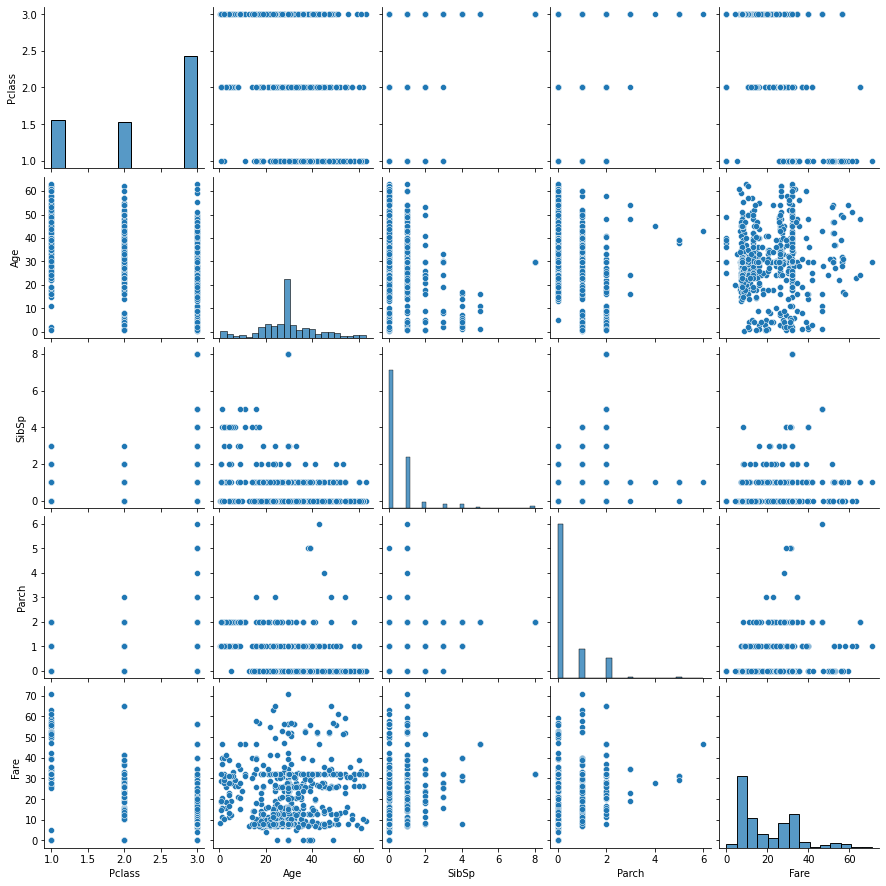

In [ ]:
# Visualizing the features
# Pairplot
sns.pairplot(X_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


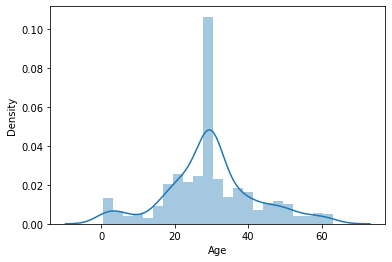

In [ ]:
# Histograms
sns.distplot(X_train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


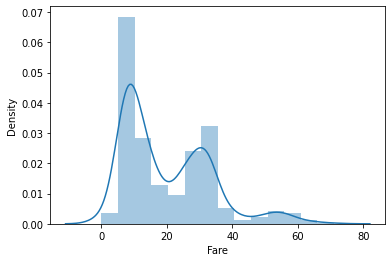

In [ ]:
sns.distplot(X_train['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


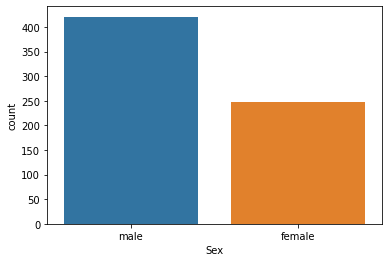

In [ ]:
# countplots
sns.countplot(X_train['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


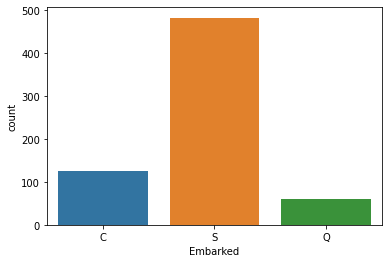

In [ ]:
sns.countplot(X_train['Embarked'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


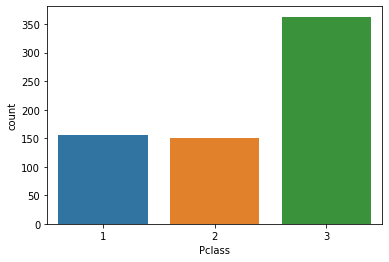

In [ ]:
sns.countplot(X_train['Pclass'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


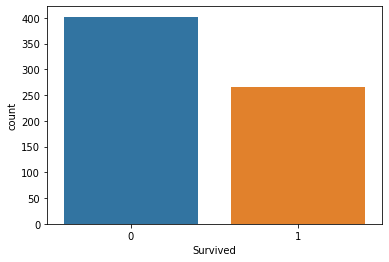

In [ ]:
sns.countplot(y_train['Survived'])

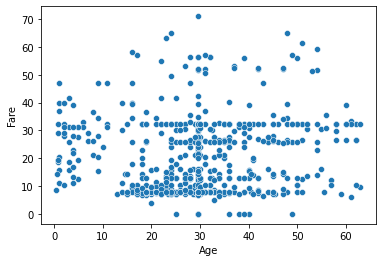

In [ ]:
# Scatter plot
sns.scatterplot(x=X_train['Age'],y=X_train['Fare'])

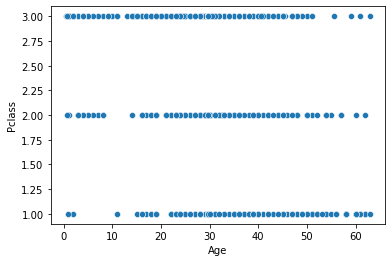

In [ ]:
sns.scatterplot(x=X_train['Age'],y=X_train['Pclass'])

Encoding of features

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 285 to 249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Sex       668 non-null    object 
 2   Age       668 non-null    float64
 3   SibSp     668 non-null    int64  
 4   Parch     668 non-null    int64  
 5   Fare      668 non-null    float64
 6   Embarked  668 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 61.8+ KB


In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
285,3,male,33.0,0,0,8.6625,C
710,1,female,24.0,0,0,49.5042,C
774,2,female,54.0,1,3,23.0000,S
117,2,male,29.0,1,0,21.0000,S
623,3,male,21.0,0,0,7.8542,S


In [ ]:
# So lets encode/convert the 'Sex' and 'Embarked' column into numbers
# Either we do label encoding or one-hot encoding

from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder


le=LabelEncoder()
X_train['Sex']=le.fit_transform(X_train['Sex'])
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
285,3,1,33.000000,0,0,8.662500,C
710,1,0,24.000000,0,0,49.504200,C
774,2,0,54.000000,1,3,23.000000,S
117,2,1,29.000000,1,0,21.000000,S
623,3,1,21.000000,0,0,7.854200,S
...,...,...,...,...,...,...,...
753,3,1,23.000000,0,0,7.895800,S
305,1,1,0.920000,1,2,32.204208,S
552,3,1,29.692868,0,0,7.829200,Q
239,2,1,33.000000,0,0,12.275000,S


In [ ]:
one_hot_test=pd.get_dummies(X_train['Embarked'],prefix='class',prefix_sep='_')
X_train=X_train.drop('Embarked',axis=1)

In [ ]:
one_hot_test

,class_C,class_Q,class_S
285,1,0,0
710,1,0,0
774,0,0,1
117,0,0,1
623,0,0,1
...,...,...,...
753,0,0,1
305,0,0,1
552,0,1,0
239,0,0,1


In [ ]:
X_train=X_train.join(one_hot_test)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,class_C,class_Q,class_S
285,3,1,33.000000,0,0,8.662500,1,0,0
710,1,0,24.000000,0,0,49.504200,1,0,0
774,2,0,54.000000,1,3,23.000000,0,0,1
117,2,1,29.000000,1,0,21.000000,0,0,1
623,3,1,21.000000,0,0,7.854200,0,0,1
...,...,...,...,...,...,...,...,...,...
753,3,1,23.000000,0,0,7.895800,0,0,1
305,1,1,0.920000,1,2,32.204208,0,0,1
552,3,1,29.692868,0,0,7.829200,0,1,0
239,2,1,33.000000,0,0,12.275000,0,0,1


In [ ]:
one_hot_test=pd.get_dummies(X_test['Embarked'],prefix='class',prefix_sep='_')
X_test=X_test.drop('Embarked',axis=1)
X_test=X_test.join(one_hot_test)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,class_C,class_Q,class_S
207,3,male,26.000000,0,0,18.787500,1,0,0
309,1,female,30.000000,0,0,56.929200,1,0,0
887,1,female,19.000000,0,0,30.000000,0,0,1
166,1,female,29.692868,0,1,55.000000,0,0,1
493,1,male,29.699118,0,0,49.504200,1,0,0
...,...,...,...,...,...,...,...,...,...
883,2,male,28.000000,0,0,10.500000,0,0,1
471,3,male,38.000000,0,0,8.662500,0,0,1
582,2,male,54.000000,0,0,26.000000,0,0,1
156,3,female,16.000000,0,0,7.733300,0,1,0


In [ ]:
# Now we are finished with our encoding.
# lets's see the changes in our data
X_train.info()
# As we can see that now all the numbers are converted to integers and there are no missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 285 to 249
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   668 non-null    int64  
 1   Sex      668 non-null    int64  
 2   Age      668 non-null    float64
 3   SibSp    668 non-null    int64  
 4   Parch    668 non-null    int64  
 5   Fare     668 non-null    float64
 6   class_C  668 non-null    uint8  
 7   class_Q  668 non-null    uint8  
 8   class_S  668 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 58.5 KB


In [ ]:
# Now finally let's look at the correlation between different features
X_corr=X_train.corr().abs()
X_corr

,Pclass,Sex,Age,SibSp,Parch,Fare,class_C,class_Q,class_S
Pclass,1.000000,0.105075,0.342576,0.101964,0.045378,0.625905,0.241950,0.243554,0.055253
Sex,0.105075,1.000000,0.069728,0.105289,0.255785,0.167870,0.061860,0.073907,0.101137
Age,0.342576,0.069728,1.000000,0.224540,0.212849,0.102997,0.018056,0.023853,0.000496
SibSp,0.101964,0.105289,0.224540,1.000000,0.425970,0.338431,0.055112,0.066195,0.090329
Parch,0.045378,0.255785,0.212849,0.425970,1.000000,0.346487,0.008435,0.096502,0.069012
Fare,0.625905,0.167870,0.102997,0.338431,0.346487,1.000000,0.170011,0.205584,0.016816
class_C,0.241950,0.061860,0.018056,0.055112,0.008435,0.170011,1.000000,0.150723,0.775252
class_Q,0.243554,0.073907,0.023853,0.066195,0.096502,0.205584,0.150723,1.000000,0.507588
class_S,0.055253,0.101137,0.000496,0.090329,0.069012,0.016816,0.775252,0.507588,1.000000


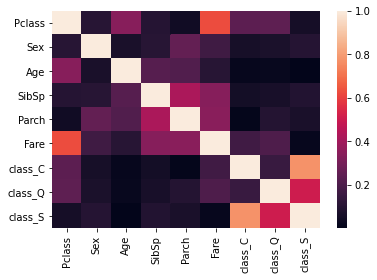

In [ ]:
# the above table can be visualized with the help of a heatmap, and thus can be interpreted in a better way
sns.heatmap(X_corr) 
